In [334]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPool2D,Flatten

In [335]:
from tensorflow import set_random_seed
set_random_seed(2)

In [336]:
from numpy.random import seed
seed(2)

In [337]:
input_width,input_height=224,224

In [338]:
input_shape=(input_width,input_height,3)

In [339]:
train_dir='fruits/train'
test_dir='fruits/test'

In [340]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [341]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [342]:
print(help('keras.optimizers'))

Help on module keras.optimizers in keras:

NAME
    keras.optimizers - Built-in optimizer classes.

CLASSES
    builtins.object
        Optimizer
            Adadelta
            Adagrad
            Adam
            Adamax
            Nadam
            RMSprop
            SGD
            TFOptimizer
    
    class Adadelta(Optimizer)
     |  Adadelta optimizer.
     |  
     |  Adadelta is a more robust extension of Adagrad
     |  that adapts learning rates based on a moving window of gradient updates,
     |  instead of accumulating all past gradients. This way, Adadelta continues
     |  learning even when many updates have been done. Compared to Adagrad, in the
     |  original version of Adadelta you don't have to set an initial learning
     |  rate. In this version, initial learning rate and decay factor can
     |  be set, as in most other Keras optimizers.
     |  
     |  It is recommended to leave the parameters of this optimizer
     |  at their default values.
     |  
   

In [343]:
train_datagen=ImageDataGenerator(rescale=1. /255,zoom_range=0.1,shear_range=0.1,horizontal_flip=True)

In [344]:
test_datagen=ImageDataGenerator(rescale=1. /255)

In [345]:
train_datagenerator=train_datagen.flow_from_directory(train_dir,batch_size=5,target_size=(input_width,input_height),class_mode='categorical')

Found 672 images belonging to 5 classes.


In [346]:
test_datagenerator=test_datagen.flow_from_directory(test_dir,batch_size=5,target_size=(input_width,input_height),class_mode='categorical')

Found 130 images belonging to 5 classes.


In [347]:
history=model.fit_generator(train_datagenerator,steps_per_epoch=20,epochs=5,validation_data=test_datagenerator,validation_steps=10)

Epoch 1/5
20/20 [==============================] - 6s 324ms/step - loss: 1.5604 - acc: 0.3000 - val_loss: 1.0873 - val_acc: 0.7000
Epoch 2/5
20/20 [==============================] - 6s 287ms/step - loss: 0.8557 - acc: 0.7000 - val_loss: 0.7822 - val_acc: 0.8200
Epoch 3/5
20/20 [==============================] - 6s 285ms/step - loss: 0.6142 - acc: 0.8400 - val_loss: 0.2276 - val_acc: 0.9600
Epoch 4/5
20/20 [==============================] - 6s 283ms/step - loss: 0.2757 - acc: 0.8800 - val_loss: 0.0607 - val_acc: 1.0000
Epoch 5/5
20/20 [==============================] - 6s 284ms/step - loss: 0.1173 - acc: 0.9700 - val_loss: 0.1348 - val_acc: 0.9200


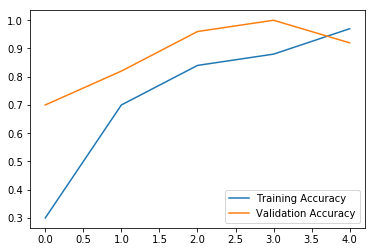

In [348]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(len(acc))
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()

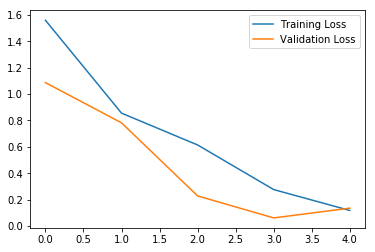

In [349]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.legend()

In [350]:
probablities=model.predict_generator(test_datagenerator,steps=10)


In [351]:
import numpy as np

In [352]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict_generator(test_datagenerator,26)
y_pred=np.argmax(y_pred,axis=1)

In [353]:
print(classification_report(test_datagenerator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.17      0.16        24
           1       0.12      0.13      0.13        30
           2       0.30      0.23      0.26        30
           3       0.06      0.06      0.06        16
           4       0.15      0.17      0.16        30

   micro avg       0.16      0.16      0.16       130
   macro avg       0.16      0.15      0.16       130
weighted avg       0.17      0.16      0.16       130



In [354]:
print(confusion_matrix(test_datagenerator.classes,y_pred))

[[ 4  7  2  6  5]
 [ 9  4  3  3 11]
 [ 4  8  7  4  7]
 [ 1  5  4  1  5]
 [ 7  9  7  2  5]]


In [355]:
from keras.preprocessing import image
from os import listdir
from os.path import isfile,join


In [356]:
mypath="fruits/images/"

In [357]:
onlyfiles=[f for f in listdir(mypath) if isfile(join(mypath,f))]

In [363]:
for file in listdir(mypath):
    img=image.load_img(mypath+file,target_size=(input_width,input_height))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    classes=model.predict_classes(images,batch_size=10)
    if classes[0]==0:
        print(file," : Apple")
    elif classes[0]==1:
        print(file," : Banana")
    elif classes[0]==2:
        print(file," : Cactus Fruit")
    elif classes[0]==3:
        print(file," : Kiwi")
    else:
        print(file," : Mango")

102_100.jpg  : Banana
103_100.jpg  : Apple
104_100.jpg  : Apple
109_100.jpg  : Banana
114_100.jpg  : Banana
115_100.jpg  : Apple
116_100.jpg  : Apple
126_100.jpg  : Apple
127_100.jpg  : Apple
12_100.jpg  : Mango
137_100.jpg  : Apple
138_100.jpg  : Apple
139_100.jpg  : Mango
148_100.jpg  : Apple
149_100.jpg  : Apple
150_100.jpg  : Mango
151_100.jpg  : Mango
153_100.jpg  : Mango
165_100.jpg  : Banana
16_100.jpg  : Cactus Fruit
196_100.jpg  : Banana
209_100.jpg  : Banana
249_100.jpg  : Banana
258_100.jpg  : Cactus Fruit
260_100.jpg  : Mango
261_100.jpg  : Banana
274_100.jpg  : Mango
278_100.jpg  : Mango
280_100.jpg  : Banana
287_100.jpg  : Cactus Fruit
288_100.jpg  : Cactus Fruit
298_100.jpg  : Banana
299_100.jpg  : Mango
300_100.jpg  : Banana
303_100.jpg  : Banana
304_100.jpg  : Banana
308_100.jpg  : Banana
311_100.jpg  : Banana
312_100.jpg  : Mango
314_100.jpg  : Banana
315_100.jpg  : Cactus Fruit
318_100.jpg  : Cactus Fruit
319_100.jpg  : Mango
37_100.jpg  : Kiwi
38_100.jpg  : Kiwi
39_